In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

# Programs: 
DESeq2 = "DESeq2"
Limma = "Limma-voom"

In [6]:
def p_value_list(filename, program):
    
    p_values = []
    inputfile = open(filename, "r")
    
    processed_header = False
    for line in inputfile:
    
        fields = line.strip().split()
        
        if program == DESeq2:
            p_value = fields[5]
            
        elif program == Limma: 
            
            # Skip the first line. It's the header line. 
            if processed_header == False:
                processed_header = True
                continue
                
            p_value = fields[4]
 
        # Skip lines that have invalid numbers
        if "NA" in line:
            continue

        p_values.append(float(p_value))
        
    return p_values
    

In [4]:
def p_value_distribution(radiation, unloading, combination, data_name, program):

    radiation_p_values = p_value_list(radiation, program)
    unloading_p_values = p_value_list(unloading, program)
    combination_p_values = p_value_list(combination, program)        

    fig, axs = plt.subplots(1, 3, sharey=True)

    n_bins = 40
    
    axs[0].hist(radiation_p_values, bins=n_bins)
    axs[0].set_title("Radiation")
    axs[1].hist(unloading_p_values, bins=n_bins)
    axs[1].set_title("Unloading")
    axs[2].hist(combination_p_values, bins=n_bins)
    axs[2].set_title("Combination")

    fig = gcf()
    fig.suptitle("P-Value Distribution: " + data_name, fontsize=14)
    plt.show()

## P-value distributions with DESeq2

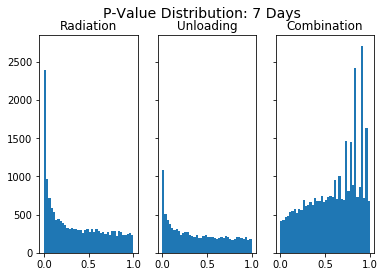

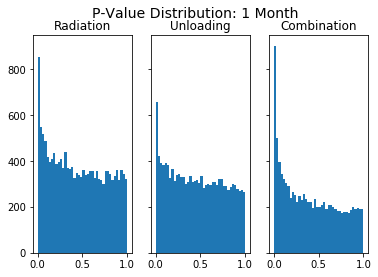

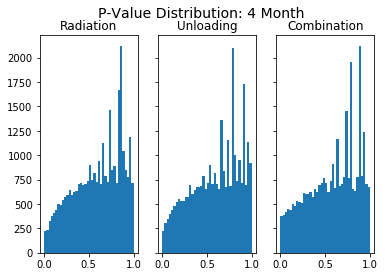

In [7]:

p_value_distribution("../DESeq2_Output/Retina/7day/Galaxy22-[DESeq2_result_file_on_Radiation1_vs_Control1].tabular",
                     "../DESeq2_Output/Retina/7day/Galaxy25-[DESeq2_result_file_on_Unloaded1_vs_Control1].tabular",
                     "../DESeq2_Output/Retina/7day/Galaxy28-[DESeq2_result_file_on_Combination1_vs_Control1].tabular",
                     "7 Days", 
                     "DESeq2")

p_value_distribution("../DESeq2_Output/Retina/1month/Galaxy21-[DESeq2_result_file_on_Radiation2_vs_Control2].tabular",
                     "../DESeq2_Output/Retina/1month/Galaxy24-[DESeq2_result_file_on_Unloaded2_vs_Control2].tabular",
                     "../DESeq2_Output/Retina/1month/Galaxy27-[DESeq2_result_file_on_Combination2_vs_Control2].tabular",
                     "1 Month", 
                     "DESeq2")

p_value_distribution("../DESeq2_Output/Retina/4month/Galaxy19-[DESeq2_result_file_on_Radiation3_vs_Control3].tabular",
                     "../DESeq2_Output/Retina/4month/Galaxy22-[DESeq2_result_file_on_Unloaded3_vs_Control3].tabular",
                     "../DESeq2_Output/Retina/4month/Galaxy25-[DESeq2_result_file_on_Combination3_vs_Control3].tabular",
                     "4 Month", 
                     "DESeq2")


## P-value distributions with Limma-voom 

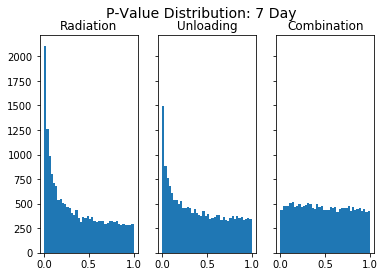

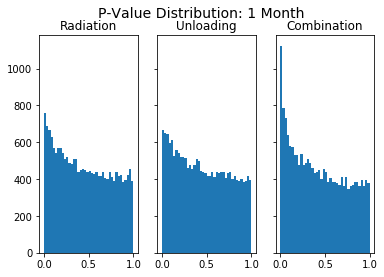

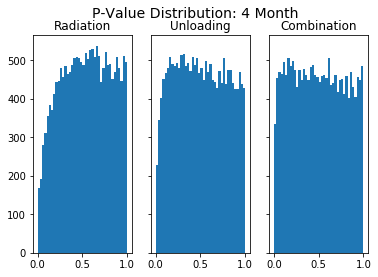

In [8]:
p_value_distribution("../Limma_Output/7day/Galaxy31-[limma_on_data_12,_data_11,_and_others__Tables__limma-voom_radiation-control].tabular",
                     "../Limma_Output/7day/Galaxy34-[limma_on_data_12,_data_11,_and_others__Tables__limma-voom_unloaded-control].tabular",
                     "../Limma_Output/7day/Galaxy37-[limma_on_data_12,_data_11,_and_others__Tables__limma-voom_combination-control].tabular",
                     "7 Day", 
                     "Limma-voom")

p_value_distribution("../Limma_Output/1month/Galaxy30-[limma_on_data_9,_data_8,_and_others__Tables__limma-voom_radiation-control].tabular",
                     "../Limma_Output/1month/Galaxy33-[limma_on_data_9,_data_8,_and_others__Tables__limma-voom_unloaded-control].tabular",
                     "../Limma_Output/1month/Galaxy36-[limma_on_data_9,_data_8,_and_others__Tables__limma-voom_combination-control].tabular",
                     "1 Month", 
                     "Limma-voom")

p_value_distribution("../Limma_Output/4month/Galaxy28-[limma_on_data_8,_data_7,_and_others__Tables__limma-voom_radiation-control].tabular",
                     "../Limma_Output/4month/Galaxy30-[limma_on_data_8,_data_7,_and_others__Tables__limma-voom_unloaded-control].tabular",
                     "../Limma_Output/4month/Galaxy33-[limma_on_data_8,_data_7,_and_others__Tables__limma-voom_combination-control].tabular",
                     "4 Month", 
                     "Limma-voom")